In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

EDA

In [9]:
df.drop('RowNumber', axis = 1 , inplace = True)

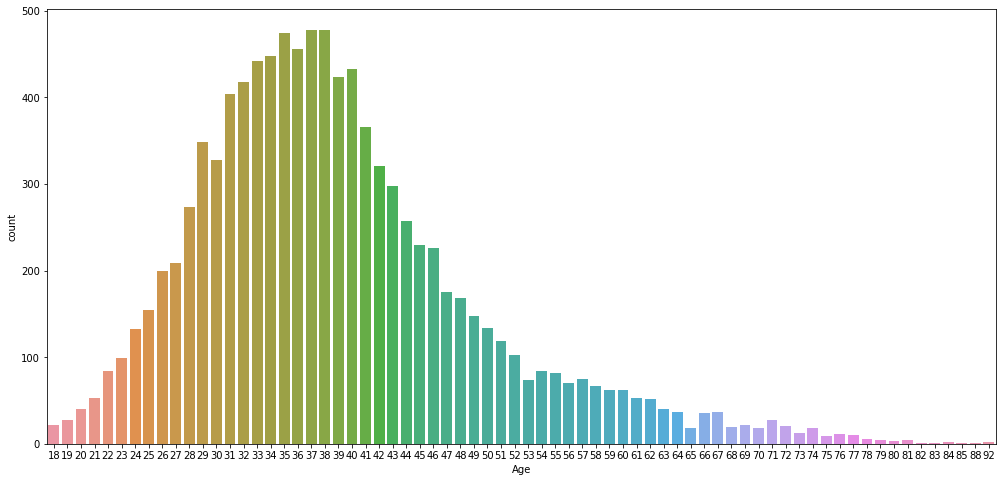

In [10]:
fig = plt.figure(figsize=(17,8))
sns.countplot(data=df,x='Age')

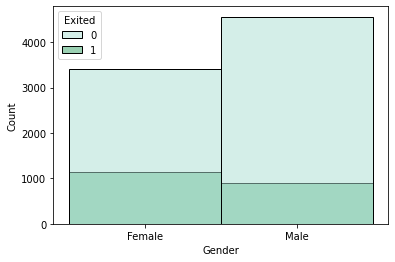

In [11]:
sns.histplot(df,x='Gender',hue='Exited',palette='BuGn')

In [12]:
df.groupby(['Gender','Geography'])['Exited'].sum()

Gender  Geography
Female  France       460
        Germany      448
        Spain        231
Male    France       350
        Germany      366
        Spain        182
Name: Exited, dtype: int64

In [13]:
df.groupby(['Geography'])['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In [14]:
df.drop(['CustomerId','Surname'],axis= 1, inplace =True)

In [15]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [16]:
df.duplicated().sum()

0

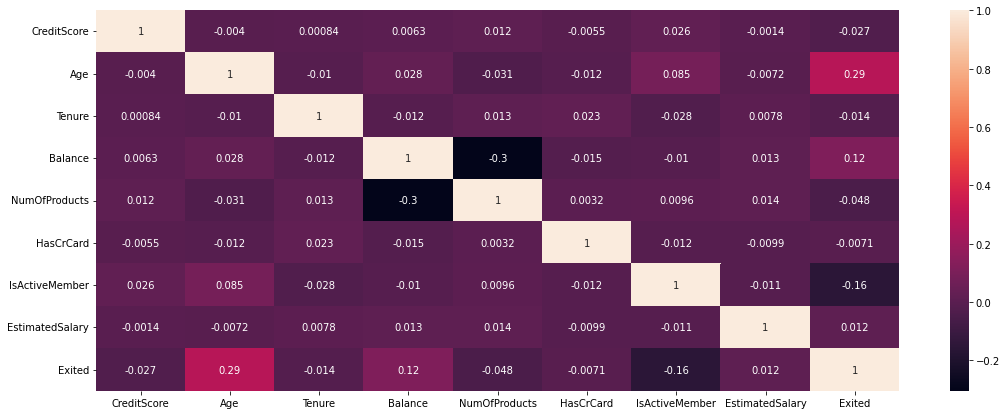

In [17]:
fig = plt.figure(figsize=(18,7))
sns.heatmap(df.corr(),annot=True)

In [18]:
x = df.drop('Exited',axis=1)
y = df['Exited']

In [19]:
x = pd.get_dummies(x)

In [20]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain, xtest , ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=101)

In [23]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((7500, 13), (2500, 13), (7500,), (2500,))

# Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [25]:
print(xtrain)

[[-0.63721564 -0.64568349 -1.72396178 ... -0.57201287  1.0957665
  -1.0957665 ]
 [-0.91679792 -0.45479971  0.3435794  ... -0.57201287  1.0957665
  -1.0957665 ]
 [-0.90644302 -0.64568349  1.72194018 ... -0.57201287  1.0957665
  -1.0957665 ]
 ...
 [ 0.66750165  0.21329354  1.03275979 ... -0.57201287 -0.91260319
   0.91260319]
 [-0.76147443 -0.64568349 -0.34560099 ... -0.57201287 -0.91260319
   0.91260319]
 [ 0.015143   -0.83656727 -1.03478139 ...  1.74821241  1.0957665
  -1.0957665 ]]


In [26]:
print(xtest)

[[-0.33692357  1.26315436  1.03275979 ...  1.74821241 -0.91260319
   0.91260319]
 [-0.36798826 -1.50466052  1.03275979 ... -0.57201287 -0.91260319
   0.91260319]
 [-1.40347818  0.690503    0.3435794  ... -0.57201287  1.0957665
  -1.0957665 ]
 ...
 [ 0.89530943 -0.16847403  1.03275979 ...  1.74821241  1.0957665
  -1.0957665 ]
 [-2.47003279  0.02240976 -1.37937158 ... -0.57201287 -0.91260319
   0.91260319]
 [-1.22744489  1.16771246  0.3435794  ... -0.57201287 -0.91260319
   0.91260319]]


# ANN

In [27]:
import keras
from keras.models import Sequential
from keras.layers import Dense


# Initialize

In [28]:
model_ann = Sequential()

# Adding First Input Layer and Hidden Layer

In [29]:
model_ann.add(Dense(activation='relu',input_dim=13,units=6,kernel_initializer='uniform'))

# Addig Second Hidden Layer

In [30]:
model_ann.add(Dense(activation='relu',units=6,kernel_initializer='uniform'))

# Adding Output Layer

In [31]:
model_ann.add(Dense(activation='sigmoid',units=1,kernel_initializer='uniform'))

# Compiling ann 

In [32]:
model_ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 84        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 133
Trainable params: 133
Non-trainable params: 0
_________________________________________________________________


# Model training

In [34]:
model_ann.fit(xtrain,ytrain,validation_split=0.33,batch_size=32,epochs=100)

Epoch 1/100
157/157 [==============================] - 2s 4ms/step - loss: 0.6183 - accuracy: 0.7968 - val_loss: 0.4850 - val_accuracy: 0.7985
Epoch 2/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4563 - accuracy: 0.7984 - val_loss: 0.4377 - val_accuracy: 0.7985
Epoch 3/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7984 - val_loss: 0.4306 - val_accuracy: 0.7985
Epoch 4/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4383 - accuracy: 0.7984 - val_loss: 0.4270 - val_accuracy: 0.7985
Epoch 5/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.7984 - val_loss: 0.4246 - val_accuracy: 0.7985
Epoch 6/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7984 - val_loss: 0.4226 - val_accuracy: 0.7985
Epoch 7/100
157/157 [==============================] - 0s 3ms/step - loss: 0.4321 - accuracy: 0.7984 - val_loss: 0.4216 - val_accuracy: 0.7985

In [35]:
ypred = model_ann.predict(xtest)

In [36]:
ypred = (ypred>0.5)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report ,accuracy_score

In [38]:
acc= accuracy_score(ytest,ypred)
acc

0.838

In [39]:
print(confusion_matrix(ytest,ypred))

[[1923   52]
 [ 353  172]]


In [40]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1975
           1       0.77      0.33      0.46       525

    accuracy                           0.84      2500
   macro avg       0.81      0.65      0.68      2500
weighted avg       0.83      0.84      0.81      2500



Accuracy  =** 83.8% **